# Linear regression

After see [how linear regression works](http://demiledge.com/artificialIntelligence/linearRegression.php). Let's start this journey inside machine learning and its tools with the basic and most intuitive model, a simple linear regression model. My aim at the moment is not trying to find a good result but explain the fundamentals of machine learning and in my opinion, the basic question : Compared to the human learning process, how we can emulate it in machines?

## Data representation

In [12]:
import pandas as pd
dataset=pd.read_csv("Housing.csv")
dataset.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


As we can notice from the first 5 examples, each record has 12 features. What I want to do is use the *lotsize* feature to **predict** the house price. The *house price* is a continous variables, so it is going to be a **regression problem**. I want that my model recognizes and understands, how the values of *lotsize* affect the house price, extrapolating the inner information carried by the feature, that's it.


The input data that I need is the feauture *lotsize* that can be retrieved in the following way

In [13]:
inputData=dataset['lotsize']
inputData.head()

0    5850
1    4000
2    3060
3    6650
4    6360
Name: lotsize, dtype: int64

Now, is the turn of the labels, the feature that the model should be able to predict given the input

In [14]:
labels=dataset['price']
labels.head()

0    42000.0
1    38500.0
2    49500.0
3    60500.0
4    61000.0
Name: price, dtype: float64

Now that we have our data, Is good practice to plot them on a 2D plane in order to have some insight about how the data are relate. Using matplotlib, the `%matplotlib inline` command is used to display matplotlib in jupyter notebook.

In [15]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

I want plot my dataset using the x-axis for the feature *lostzie* and for the y-axis the value that we want to predict: *house price*.

In [16]:
x_axis=inputData
y_axis=labels

I'm going to plot the first 50 examples in order to keep the diagram clean. The code below basically says,
for every example in the dataset, take the *lotsize* on the x axis and the *house price* on the y one. Then, plot the example in the 2Dplane, repeat the process 50 times. For instance, the first example has idx=0, so its 
feature will be the data list in index 0 and its label in list labels on idx 0.

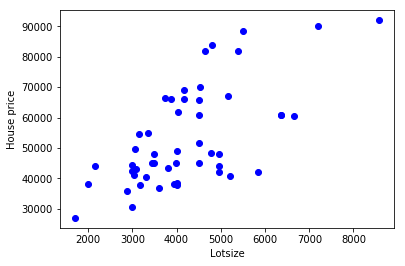

In [17]:
for idx in range(50):
    plt.plot(x_axis[idx], y_axis[idx], marker="o", c="blue")
plt.xlabel("Lotsize")
plt.ylabel("House price")
plt.show()

As you can see, our model has a rappresentation for each examples, If the lotsize=5850, the price=42000. Now, it has to learn "the rule" that allow him to correctly predict the *house price*. It has to learn the function that minimize the distance between all the points.

## The model

We have just 1 feature which means that we need just 1 parameter linked to the feature plus a bias, the function is a simple straight line given by the formula

<img src="images/linear1.gif" >

Where x is our input value *lotsize*, while our f(x) is the *house price* value that the model thinks is the most appropriate one for the given x. The simple straight line requires a parameter *a* which defines the slope of the line and a parameter *b* which defines the intersection with the y axis. In order to correctly classify the examples and learn the rule, **the model has to find the best values for these parameters** using some optimization technique.

The data retrieved are in serie format and we have to convert it to numpy array. So, we need to convert them and scale between -1 and 1. I scaled because otherwise the error would become too bigger.
>**N.B** If you want to scale some data, you have to do for all the data, all the inputs and the output, otherwise you lost the correlation.

Then initialize a,b to whatever value (i choose 0) and the **learning rate**. Before start the training process I define some empty lists which are going to store how the error and parameters change over time for illustration purposes. Now, we are ready to train the model.

For each epoch, compute the error and the derivates of the parameters respect to the error. In order to achieve this, Iterate through all the examples. Then, store the values of the epoch and update the parameters.

## Cost function and training

In [18]:
import numpy as np
from sklearn import preprocessing

#convert dataframe serie to numpy array
x=inputData.values
y=labels.values

#scale them
x=preprocessing.scale(x)
y=preprocessing.scale(y)


a=0
b=0
N=float(len(x))
epochs=5000
learnRate=0.001

#for error diagram
epochsList=[]
errors=[]
aList=[]
bList=[]

for epoch in range(epochs):
    error=0
    a_deriv=0
    b_deriv=0
    for idx in range(len(x)):
        output=a*x[idx] + b
        error+=((y[idx]-output)**2)/N

        a_deriv += -(2/N)*x[idx]*(y[idx]-output)
        b_deriv += -(2/N)*(y[idx]-output)

    #append results for the diagram
    epochsList.append(epoch)
    aList.append(a)
    bList.append(b)
    errors.append(error)
    #update parameters
    a=a- (learnRate*a_deriv)
    b=b- (learnRate*b_deriv)

print("a= %.4f " %a)
print("b= %.4f" %b)
print("cost: %.4f " %error)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


a= 0.5358 
b= -0.0000
cost: 0.7129 


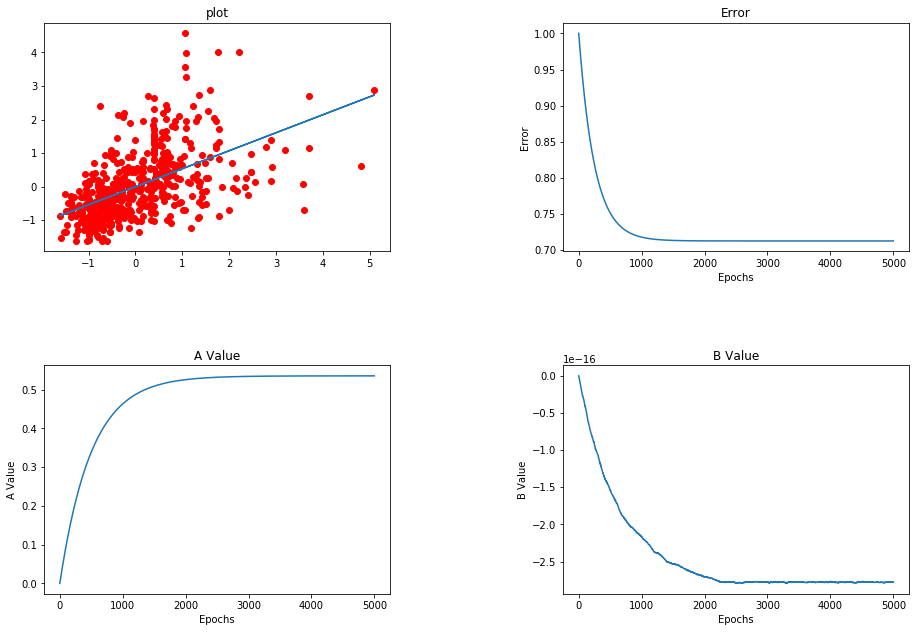

In [19]:
f, ((ax1, ax2), (ax3, ax4))=plt.subplots(2,2)
ax1.plot(x, y, 'o', c='red')
ax1.plot(x, a*x + b, '-')
ax1.set_title('plot')

ax2.plot(epochsList, errors, '-')
ax2.set_title('Error')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Error')

ax3.plot(epochsList, aList, '-')
ax3.set_title('A Value')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('A Value')

ax4.plot(epochsList, bList, '-')
ax4.set_title('B Value')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('B Value')

f.subplots_adjust(hspace=0.5, wspace=0.5)
f.set_size_inches(15.5, 10.5)

The *plot* shows how the model fit with the **scaled** data, the *error* shows how the error change over each epoch. It decreased which means that the model learned to predict the *house price*. While the plots *A value* and *B value* shows how the parameters changed over the epochs